# 

### 1. Look at the big picture.
### 2. Get the data.
### 3. Discover and visualize the data to gain insights.
### 4. Prepare the data for Machine Learning algorithms.
### 5. Select a model and train it.
### 6. Fine-tune your model.
### 7. Present your solution.
### 8. Launch, monitor, and maintain your system.

In [2]:
# Configure access to Kaggle API credentials to be from .env

import os
from dotenv import load_dotenv

# Load variables from .env file
load_dotenv()

# Set Kaggle API credentials for the session
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

In [3]:
# Imports

# Dataset download
import shutil
from pathlib import Path
import zipfile
import kaggle

# Data processing & exploration
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt





In [4]:
# Download the dataset

# Define project paths
PROJECT_DIR = Path(r"C:\Users\ohjin\OneDrive\문서\Python\HandsonML")
DATASET_NAME = "kanchana1990/texas-real-estate-trends-2024-500-listings"

# Change to project directory
os.makedirs(PROJECT_DIR, exist_ok=True)
os.chdir(PROJECT_DIR)

def fetch_and_extract_housing_data(project_dir=PROJECT_DIR, dataset_name=DATASET_NAME):
    # Download dataset from Kaggle
    print("Downloading dataset from Kaggle...")
    kaggle.api.dataset_download_files(dataset_name, path=project_dir, unzip=False)
    print("Download complete.")
    print("==================================================")

    # Find the zip file and extract
    zip_files = list(project_dir.glob("*.zip"))
    if not zip_files:
        raise FileNotFoundError("No zip files found in project directory after Kaggle download.")

    for zip_path in zip_files:
        print(f"Extracting {zip_path.name}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(project_dir)
        # Optional: Clean up zip after extraction
        os.remove(zip_path)
        print(f"Extracted and removed {zip_path.name}")
    print("==================================================")

    # Verify CSV presence
    csv_files = list(project_dir.glob("*.csv"))
    if csv_files:
        print(f"CSV file(s) found: {[csv.name for csv in csv_files]}")
    else:
        raise FileNotFoundError("No CSV files found after extraction.")
    
    return csv_files[0]
    
csv_file = fetch_and_extract_housing_data()

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/texas-real-estate-trends-2024-500-listings
Download complete.
Extracting texas-real-estate-trends-2024-500-listings.zip...
Extracted and removed texas-real-estate-trends-2024-500-listings.zip
CSV file(s) found: ['real_estate_texas_500_2024.csv']


In [5]:
# Load data
def load_housing_data(csv_file=csv_file): 
    return pd.read_csv(csv_file)

df = load_housing_data()

In [6]:
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
df.head()

501 rows x 14 columns


,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        499 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       436 non-null    float64
 6   baths_full_calc  436 non-null    float64
 7   beds             440 non-null    float64
 8   sqft             438 non-null    float64
 9   stories          391 non-null    float64
 10  sub_type         10 non-null     object 
 11  text             495 non-null    object 
 12  type             501 non-null    object 
 13  year_built       289 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 54.9+ KB


In [8]:
df.baths_full.value_counts()

baths_full
2.0    282
3.0     99
4.0     26
1.0     24
5.0      4
8.0      1
Name: count, dtype: int64

In [9]:
df.describe()

,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built
count,5.010000e+02,4.990000e+02,501.000000,436.000000,436.000000,440.000000,438.000000,391.000000,289.000000
mean,9.193045e+09,5.106686e+05,2.323353,2.332569,2.332569,3.454545,2334.568493,1.375959,1999.536332
std,7.789197e+08,1.321054e+06,1.286559,0.759276,0.759276,0.914439,3220.244985,0.525586,25.400942
min,7.021680e+09,1.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,8.995365e+09,2.647450e+05,2.000000,2.000000,2.000000,3.000000,1604.250000,1.000000,1981.000000
50%,9.419976e+09,3.749000e+05,2.000000,2.000000,2.000000,3.000000,2034.500000,1.000000,2006.000000
75%,9.798074e+09,5.390000e+05,3.000000,3.000000,3.000000,4.000000,2636.500000,2.000000,2022.000000
max,9.992374e+09,2.895000e+07,8.000000,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


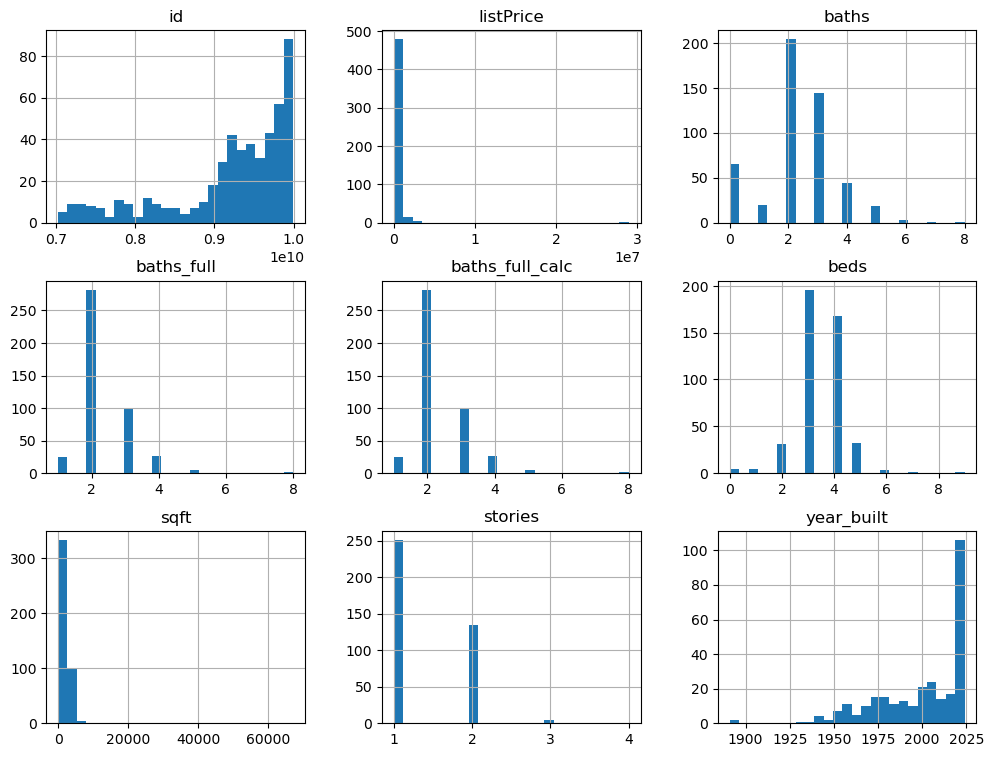

In [10]:
# Histogram
df.hist(bins=25, figsize=(12,9))
plt.show()